In [53]:
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/87c72c7b117de3aaaabc62e72683d98e/asset-v1:hse+STATDA+2021+type@asset+block/MarvelComicCaracters.csv', sep=';')
df.head()

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0
1,Captain America (Steven Rogers),Добрый персонаж,Голубые глаза,Белые волосы,Мужской персонаж,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Нейтральный персонаж,Голубые глаза,Черные волосы,Мужской персонаж,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Добрый персонаж,Голубые глаза,Черные волосы,Мужской персонаж,2961.0,1963.0
4,Thor (Thor Odinson),Добрый персонаж,Голубые глаза,Русые волосы,Мужской персонаж,2258.0,1950.0


In [7]:
df.appearances.isna().sum()

1096

In [23]:
q1_df = df.dropna(subset=['appearances'])
q1_df.groupby('align')['appearances'].describe()
q1_df[q1_df['align'] == 'Добрый персонаж']['appearances'].quantile(0.75) - q1_df[q1_df['align'] == 'Добрый персонаж']['appearances'].quantile(0.25)

13.0

In [29]:
q2_df = df.dropna(subset=['appearances'])
IQR = q2_df['appearances'].quantile(0.75) - q2_df['appearances'].quantile(0.25)
IQR_bottom = q2_df['appearances'].quantile(0.25) - 1.5 * IQR
IQR_top = q2_df['appearances'].quantile(0.75) + 1.5 * IQR
print(IQR_bottom, IQR_top)
q2_df[q2_df['appearances'] > IQR_top]['appearances'].shape[0]


-9.5 18.5


1938

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1).

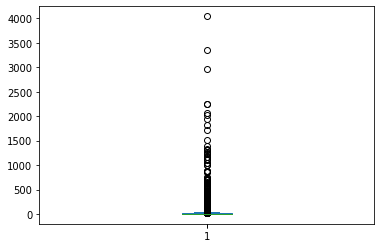

In [51]:
group_q2_df = q2_df.groupby('align')['appearances']
IQR_group_q2_df = group_q2_df.quantile(0.75) - group_q2_df.quantile(0.25)
IQR_group_q2_df_top = IQR_group_q2_df * 1.5 + group_q2_df.quantile(0.75)

In [62]:
dropNa_df = df.dropna(subset=['appearances'])
dropNa_df['log_appearences'] = np.log(dropNa_df['appearances'])

C:\Temp/ipykernel_10256/2697986495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropNa_df['log_appearences'] = np.log(dropNa_df['appearances'])


In [63]:
Mean_df = dropNa_df['log_appearences'].mean()
Std_df = dropNa_df['log_appearences'].std()
top = Mean_df + 3 * Std_df

dropNa_df[dropNa_df['log_appearences'] > top].shape[0]

195

In [68]:
Mean1 = dropNa_df['appearances'].mean()
std1 = dropNa_df['appearances'].std()
top1 = Mean1 + 3 * std1
dropNa_df[dropNa_df['appearances'] > top1].shape[0]

128

In [74]:
Mean2 = dropNa_df[dropNa_df['sex'] == 'Женский персонаж']['appearances'].mean()
std2 = dropNa_df[dropNa_df['sex'] == 'Женский персонаж']['appearances'].std()
top2 = Mean2 + 3 * std2
dropNa_df[(dropNa_df['sex'] == 'Женский персонаж') & (dropNa_df['appearances'] > top2)]['appearances'].shape[0]

48

In [83]:
IQR1 = dropNa_df.appearances.quantile(0.75) - dropNa_df.appearances.quantile(0.25)
IQR1_top = dropNa_df.appearances.quantile(0.75) + IQR1 * 1.5
IQR1_bottom = dropNa_df.appearances.quantile(0.25) - IQR1 * 1.5
dropNa_df[(dropNa_df['appearances'] < IQR1_bottom) | (dropNa_df['appearances'] > IQR1_top)]['appearances'].mean()
# print(IQR1_top, IQR1_bottom)

107.0500515995872

In [99]:
Mean11 = dropNa_df['appearances'].mean()
std1 = dropNa_df['appearances'].std()
B1 = Mean1 - 3 * std1
B2 = Mean1 + 3 * std1
dropNa_df[(dropNa_df['appearances'] > B1) | (dropNa_df['appearances'] < B2)]['appearances'].mean()

17.033376963350786

In [92]:
Mode1 = dropNa_df[(dropNa_df['sex'] == 'Женский персонаж') & (dropNa_df['align'] == 'Добрый персонаж')]['hair'].value_counts()
Mode2 = df[(df['sex'] == 'Женский персонаж') & (df['align'] == 'Добрый персонаж')]['hair'].value_counts()
print(Mode2, Mode1, end=' ')

Черные волосы            442
Русые волосы             329
Каштановые волосы        242
Белые волосы              60
Без волос                 25
Светло-розовые волосы     16
Зеленые волосы            15
Фиолетовые волосы         10
Розовые волосы             8
Оранжевые волосы           4
Серебристые волосы         3
Пурпурные волосы           2
Разноцветные волосы        2
Золотые волосы             1
Желтые волосы              1
Name: hair, dtype: int64 Черные волосы            418
Русые волосы             309
Каштановые волосы        236
Белые волосы              56
Без волос                 22
Светло-розовые волосы     16
Зеленые волосы            13
Фиолетовые волосы         10
Розовые волосы             7
Оранжевые волосы           4
Серебристые волосы         2
Пурпурные волосы           2
Разноцветные волосы        2
Золотые волосы             1
Желтые волосы              1
Name: hair, dtype: int64 

In [95]:
IQR3 = dropNa_df[dropNa_df['align'] == 'Злой персонаж']['appearances'].quantile(0.75) - dropNa_df[dropNa_df['align'] == 'Злой персонаж']['appearances'].quantile(0.25)
IQR1_bottom = dropNa_df[dropNa_df['align'] == 'Злой персонаж']['appearances'].quantile(0.25) - 1.5 * IQR3
IQR1_top = dropNa_df[dropNa_df['align'] == 'Злой персонаж']['appearances'].quantile(0.75) + 1.5 * IQR3

In [98]:
Median1 = dropNa_df[dropNa_df['align'] == 'Злой персонаж']['appearances'].median()
Median2 = dropNa_df[(dropNa_df['align'] == 'Злой персонаж') & ((dropNa_df['appearances'] > IQR1_bottom) | (dropNa_df['appearances'] < IQR1_top))]['appearances'].median()

print(Median1, Median2)

3.0 3.0


In [97]:
dropNa_df[dropNa_df['align'] == 'Злой персонаж']['appearances'].quantile(0.5)

3.0